# Homework Lecture 1

## Preliminaries

### Imports

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import sys 
sys.path.append("../..")
import E4525_ML.mnist as mnist

### Data Directories 

Create a directory with the path below

In [2]:
raw_data_dir="../../raw/MNIST"
data_dir="../../data/introduction"

<div class="alert alert-block alert-info"> Problem 0 </div>
Download the file `data.csv` and save it fo the directory `data_dir`

## Numpy Exercises

### Read and Inspect the Data 

<div class="alert alert-block alert-info"> Problem 1.1 </div>
Read the contents of `data.csv` into a panda's dataframe

In [9]:
filename="data.csv"

In [10]:
data=pd.read_csv(data_dir+"/"+filename)

<div class="alert alert-block alert-info"> Problem 1.2 </div>
What are the name of the columns?

In [15]:
data.columns.values 

array(['X', 'Y'], dtype=object)

<div class="alert alert-block alert-info"> Problem 1.3 </div>
How many rows are there?

In [17]:
row, col = data.shape
print('The number of rows is ', row)

The number of rows is  1000


<div class="alert alert-block alert-info"> Problem 1.4 </div>
List the unique values of column "X", and of column "Y"

In [15]:
data['X'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [16]:
data['Y'].unique()

array(['a', 'c', 'd', 'b', 'e'], dtype=object)

<div class="alert alert-block alert-info"> Problem 1.5 </div>
Use [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) function to get the counts of each possible value  of X and Y variables

In [278]:
pd.Series.value_counts(data["X"])

A    383
B    293
C    279
D     45
Name: X, dtype: int64

In [279]:
pd.Series.value_counts(data["Y"])

c    349
a    312
b    148
d    132
e     59
Name: Y, dtype: int64

In [18]:
data['X'].value_counts()

A    383
B    293
C    279
D     45
Name: X, dtype: int64

In [19]:
data['Y'].value_counts()

c    349
a    312
b    148
d    132
e     59
Name: Y, dtype: int64

### Basic Usage of Numpy

<div class="alert alert-block alert-info"> Problem 2.1 </div>

Use panda's function [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to
* create a variable named `data_ZX` with one row per row on the original data, and one-hot encoded `X` variable values as columns
* create a varialbe named `data_ZY` with one row per row on the original data, and one-hot encoded `Y` variable values as columns

In [19]:
data_ZX = pd.get_dummies(data['X'])

In [20]:
data_ZY = pd.get_dummies(data['Y'])

<div class="alert alert-block alert-info"> Problem 2.2 </div>
Using the dataframe function `as_matrix()`  create `numpy` arrays `ZX` and `ZY` with the occurrence data for `X` and `Y` variables

In [22]:
ZX = data_ZX.as_matrix() 

In [23]:
ZY = data_ZY.as_matrix() 

<div class="alert alert-block alert-info"> Problem 2.3 </div>
Save the column names of `data_ZX` in a variable named `X_values`, create also `Y_values`

In [24]:
X_values = data_ZX.columns.values

In [25]:
Y_values = data_ZY.columns.values

### Covariance calculation

From now on, work **only** with the variables `ZX`, and `ZY`, `X_values` and `Y_values`

<div class="alert alert-block alert-info"> Problem 3.1 </div>
Show the shape of `ZX` and `ZY` variables

In [29]:
ZX.shape

(1000, 4)

In [30]:
ZY.shape

(1000, 5)

<div class="alert alert-block alert-info"> Problem 3.2 </div>
* using `ZX`  compute the number of occurrences of each possible value of the variable X
* using `ZY`  compute the number of occurrences of each possible value of the variable Y

for each posible value of 'X' print the value (a string), and how may times it occurs on the data (an integer).
Do the same for 'Y'

In [280]:
pd.Series(X_values, np.sum(ZX,axis = 0))

383    A
293    B
279    C
45     D
dtype: object

In [34]:
X_values

array(['A', 'B', 'C', 'D'], dtype=object)

In [40]:
print('X')
print("The number of ", X_values[0], ' is', np.sum(ZX,axis=0)[0])
print("The number of ", X_values[1], ' is', np.sum(ZX,axis=0)[1])
print("The number of ", X_values[2], ' is', np.sum(ZX,axis=0)[2])
print("The number of ", X_values[3], ' is', np.sum(ZX,axis=0)[3])

X
The number of  A  is 383
The number of  B  is 293
The number of  C  is 279
The number of  D  is 45


In [37]:
Y_values

array(['a', 'b', 'c', 'd', 'e'], dtype=object)

In [41]:
print('Y')
print("The number of ", Y_values[0], ' is', np.sum(ZY,axis=0)[0])
print("The number of ", Y_values[1], ' is', np.sum(ZY,axis=0)[1])
print("The number of ", Y_values[2], ' is', np.sum(ZY,axis=0)[2])
print("The number of ", Y_values[3], ' is', np.sum(ZY,axis=0)[3])
print("The number of ", Y_values[4], ' is', np.sum(ZY,axis=0)[4])

Y
The number of  a  is 312
The number of  b  is 148
The number of  c  is 349
The number of  d  is 132
The number of  e  is 59


<div class="alert alert-block alert-info"> Problem 3.3</div>
Compute the empirical (sample) probabilities of the  values of `X` and `Y`.
$$
    \mu^X_d = \frac{1}{N} \sum_i Z^X_{i,k}
$$
and similarly for $\mu^Y_k$

Store the results on variables `muX` and `muY`

In [47]:
muX = np.sum(ZX,axis=0)/ZX.shape[0]
# muX=ZX.mean(axis=0)

In [48]:
muY = np.sum(ZY,axis=0)/ZY.shape[0]

In [49]:
muX

array([ 0.383,  0.293,  0.279,  0.045])

In [50]:
muY

array([ 0.312,  0.148,  0.349,  0.132,  0.059])

<div class="alert alert-block alert-info"> Problem 3.4 </div>
Compute the covariance matrix of `ZX` and `ZY` values defined as 
$$
    \sigma^{X}_{d,d'} = \frac{1}{N}\sum_i Z^X_{i,d}Z^X_{i,d'}- \mu^X_d \mu^X_{d'}
$$
and similarly for $\sigma^Y_{k,k'}$

In [54]:
sigmaX = np.mean(ZX[:, :, np.newaxis] * ZX[:, np.newaxis, :], axis=0) - muX[:, np.newaxis] * muX[np.newaxis, :]
print("sigma.shape", sigmaX.shape)
print(sigmaX)

sigma.shape (4, 4)
[[ 0.236311 -0.112219 -0.106857 -0.017235]
 [-0.112219  0.207151 -0.081747 -0.013185]
 [-0.106857 -0.081747  0.201159 -0.012555]
 [-0.017235 -0.013185 -0.012555  0.042975]]


In [55]:
sigmaY = np.mean(ZY[:, :, np.newaxis] * ZY[:, np.newaxis, :], axis=0) - muY[:, np.newaxis] * muY[np.newaxis, :]
print("sigma.shape", sigmaY.shape)
print(sigmaY)

sigma.shape (5, 5)
[[ 0.214656 -0.046176 -0.108888 -0.041184 -0.018408]
 [-0.046176  0.126096 -0.051652 -0.019536 -0.008732]
 [-0.108888 -0.051652  0.227199 -0.046068 -0.020591]
 [-0.041184 -0.019536 -0.046068  0.114576 -0.007788]
 [-0.018408 -0.008732 -0.020591 -0.007788  0.055519]]


<div class="alert alert-block alert-info"> Problem 3.5 </div>
Compute the convariance matrix between `ZX` and `ZY` values defined as
$$
    \sigma^{Y,X}_{k,d} = \frac{1}{N}\sum_i Z^Y_{i,k}Z^X_{i,d}- \mu^Y_k\mu^X_d 
$$

In [57]:
sigmaXY = np.mean(ZY[:, :, np.newaxis] * ZX[:, np.newaxis, :], axis=0) - muY[:, np.newaxis] * muX[np.newaxis, :]
print("sigma.shape", sigmaXY.shape)
print(sigmaXY)

sigma.shape (5, 4)
[[-0.073496  0.082584 -0.037048  0.02796 ]
 [-0.016684  0.006636  0.014708 -0.00466 ]
 [ 0.119333 -0.062257 -0.041371 -0.015705]
 [-0.006556 -0.009676  0.021172 -0.00494 ]
 [-0.022597 -0.017287  0.042539 -0.002655]]


### Exponential weighted covariance

Some times, we want to give more weight so some observations $i$  others.

For example, We could interpret the sample index $i$, as time, and we want to weight more strongly observations close to the present more 
strongly than ones far in the pass.

<div class="alert alert-block alert-info"> Problem 4.1 </div>
Generate an array $W$ of shape $(N,)$ such that
$$
    W_i =\frac{ e^{-\lambda i}}{\sum_{j} e^{-\lambda j}}
$$
with $\lambda = 4/N$

Verify that 
$$
     \sum_i W_i = 1
$$
[Hints]
* Try not write a python for loop (too slow). 
* It is probably easier to break the implementation into  two or three intermediate steps.
* The function [`numpy.arange`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.arange.html) will probably be useful.
* `lambda` is a reserved word in python.

In [89]:
N = ZX.shape[0]
import math

In [86]:
array1 = np.arange(0,1000)

In [247]:
w = np.exp(-4/N * array1)

In [248]:
d = np.sum(w)

In [249]:
wi = w/d

In [250]:
total = np.sum(wi)

In [251]:
total

1.0

<div class="alert alert-block alert-info"> Problem 4.2 </div>
Compute the $X$ and $Y$ weighted means defined as
$$
    \mu^X_{W,d} = \sum_i W_i Z^X_{i,d}
$$
and similarly for $Y$

In [113]:
ZX.shape

(1000, 4)

In [232]:
wi.shape

(1000,)

In [253]:
muX_2 = np.sum(wi[:,np.newaxis]*ZX, axis=0)

In [254]:
muX_2

array([ 0.40408487,  0.27767638,  0.26826226,  0.04997649])

In [255]:
muY_2 = np.sum(wi[:,np.newaxis]*ZY, axis = 0)

In [256]:
muY_2

array([ 0.29907652,  0.14968494,  0.35837697,  0.13982238,  0.0530392 ])

<div class="alert alert-block alert-info"> Problem 4.3 </div>
Compute the exponentially weighted  covariance matrix defined as
$$
    \sigma^{Y,X}_{W,\,k,d} = \sum_i W_i (Z^Y_{i,k} - \mu^Y_{W,k})(Z^X_{i,k} - \mu^X_{W,k})
$$

In [257]:
diff_Y = ZY - muY_2
diff_X = ZX - muX_2

In [124]:
muY_2.shape

(1, 5)

In [127]:
ZY.shape

(1000, 5)

In [131]:
 (ZY- muY_2).shape

(1000, 5)

In [132]:
(ZX- muX_2).shape

(1000, 4)

In [258]:
expw_cov = np.sum(wi[:, np.newaxis, np.newaxis] * diff_Y[:, :, np.newaxis] * diff_X[:, np.newaxis, :], axis=0)

In [259]:
expw_cov 

array([[-0.07130318,  0.08313933, -0.04055302,  0.02871686],
       [-0.02546297,  0.00412859,  0.02262073, -0.00128635],
       [ 0.13363749, -0.06965806, -0.04606901, -0.01791042],
       [-0.01543901, -0.00288213,  0.02519051, -0.00686938],
       [-0.02143234, -0.01472773,  0.03881078, -0.00265071]])

## Analyzing MNIST with Numpy

<div class="alert alert-block alert-info"> Problem 5.0 </div>
Got to MNIST dataset's [web site](http://yann.lecun.com/exdb/mnist/)'.

Download the floowing four files, and save them with those names in the raw data directory [raw/MINST](../../raw/MNIST)
* `train-images-idx3-ubyte.gz`:  training set images
* `train-labels-idx1-ubyte.gz`:  training set labels
* `t10k-images-idx3-ubyte.gz`:   test set images
* `t10k-labels-idx1-ubyte.gz`:   test set labels

Make sure not the decompress, or modify the files in any way.


<div class="alert alert-block alert-info"> Problem 5.1 </div>
Using `E54525_ML.mnist.read_images` function read the train images in file `train-images-idx3-ubyte.gz` into a variable named
`images`. 

images will be a tensor (`np.array` of floating point numbers) with three dimensions $N\times R \times C$ where
1. $N$ is the number of images
2. $R$ is the number of column pixels in an image
3. $C$ is the number of row pixels.

Show whe shape of the `images` variable

In [184]:
filename1 = 'train-images-idx3-ubyte.gz' 

In [185]:
images = mnist.read_images(raw_data_dir+"/"+filename1)

In [187]:
images.shape

(60000, 28, 28)

In [281]:
N = np.shape(images)[0]
R = np.shape(images)[1]
C = np.shape(images)[2]
print(N, R, C)

60000 28 28


<div class="alert alert-block alert-info"> Problem 5.2 </div>
Read the labels from file `train-labels-idx1-ubyte.gz`, save them in a variable named labels
What is the shape of  label's variable?

In [189]:
filename2 = 'train-labels-idx1-ubyte.gz'
labels = mnist.read_labels(raw_data_dir+"/"+filename2)
labels.shape

(60000,)

<div class="alert alert-block alert-info"> Problem 5.3 </div>
Use [`matplotlib.pyplot.imshow`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=matplotlib%20pyplot%20imshow#matplotlib.pyplot.imshow) to display the first three images on the MNIST dataset

Se the plot title to each image to the corresponding label

[HINT] set the color map to `gray` for best results

In [194]:
images.shape

(60000, 28, 28)

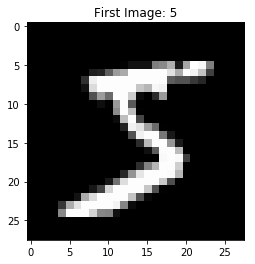

In [260]:
#matplotlib.pyplot.imshow(X, shape=None, hold=None, data=None, **kwargs)
import matplotlib.pyplot as plt
plt.imshow(images[0, :, :], cmap = 'gray')
plt.title('First Image: 5')

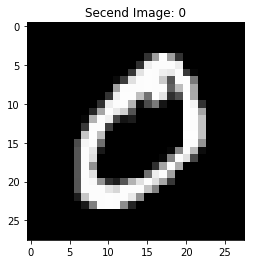

In [262]:
plt.imshow(images[1, :, :], cmap = 'gray')
plt.title('Secend Image: 0')

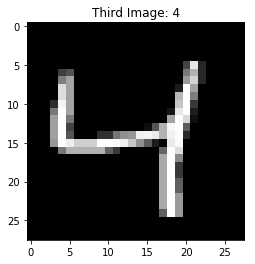

In [261]:
plt.imshow(images[2, :, :], cmap = 'gray')
plt.title('Third Image: 4')

<div class="alert alert-block alert-info"> Problem 5.3 </div>
Compute the average image (averaged over all the samples).
use `imshow` to plot the result.

[HINT] this is just averaging over the first axis of the images array

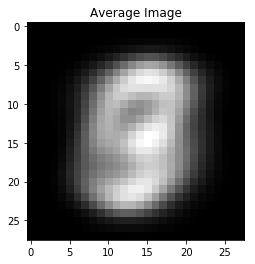

In [263]:
images_avg = np.mean(images, axis = 0)
plt.imshow(images_avg, cmap = 'gray')
plt.title("Average Image")

In [221]:
def one_hot_encode(labels):
    N=len(labels)
    K=labels.max()+1
    Z=np.zeros((len(labels),K))
    Z[np.arange(N),labels]=1
    return Z

In [277]:
labels

array([5, 0, 4, ..., 5, 6, 8])

<div class="alert alert-block alert-info"> Problem 5.4 </div>
Use the function `one_hot_encode` defined above to create a variable `Z` with the one hot encoding of the labels.

Show the shape of `Z`

In [224]:
Z = one_hot_encode(labels)

In [225]:
Z.shape

(60000, 10)

In [275]:
Z

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

<div class="alert alert-block alert-info"> Problem 5.5 </div>
Create the rank four tensor
$$
T_{i,k,r,c} = Z_{i,k}  \textrm{images}_{i,r,c}
$$


In [230]:
images.shape

(60000, 28, 28)

In [265]:
T = Z[:, :, np.newaxis, np.newaxis] * images[:, np.newaxis, :, :]
T.shape

(60000, 10, 28, 28)

<div class="alert alert-block alert-info"> Problem 5.6 </div>
Average $T$ over the sample index $i$, save to a variable named `average`

In [266]:
average = np.mean(T, axis = 0)

<div class="alert alert-block alert-info"> Problem 5.7</div>
What does `average[0]` represent? 

and `average[5]`?

In [271]:
# average[0] represents a more 'general' image of 0 using other images labeled as 0, i.e, the average of images with label 0
average[0]

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   8.36601307e-06,
          1.65359477e-05,   6.79738562e-06,   0.00000000e+00,
          5.88235294e-06,   1.60784314e-05,   7.64705882e-06,
          0.00000000e+00,   0.00000000e+00,

In [ ]:
# average[5] represents a more 'general' image of 5 using other images labeled as 5, i.e, the average of images with label 5
average[5]

<div class="alert alert-block alert-info"> Problem 5.8 </div>
use `imshow` to plot `average[0]` and `average[5]`

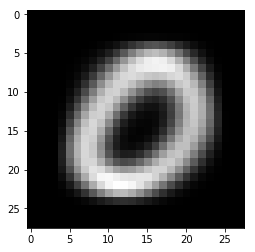

In [273]:
plt.imshow(average[0], cmap = 'gray')

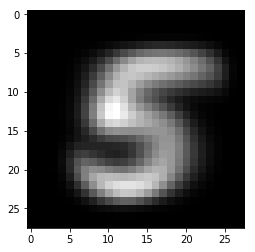

In [274]:
plt.imshow(average[5], cmap = 'gray')